# (1) Describe the Data

______________________________________________________________________________________________________________________________________________________
#### **players**:


There data set is consisted of 196 observations and 7 variables
|Variable Name|Data Type|Description|Stats|
|------------------|----------------------------|-------------|----------|
| experience | Character|experience level of the players at the game from beginner to regular to amateur to veteran to pro |N/A|
| subscribe| Logical|if the players are subscribed to the newsletter |N/A|
| hashed_email|Character|  unique encrypted way to identify each player |N/A|
| played_hours| Numeric|total hours the player has played the game |Mean=5.85|
| name| Character|player's name|N/A|
| gender| Character| player's gender, either Male, Female, Other, Two Spirited, or Prefer not to say |N/A|
| Age | Numeric| players age in years| Mean=21.14 |

**issues**:
- Gender and Experience should be a factor data type instead of a character data type
- Names remove anonymity


#### **sessions**:

This data set has 1,535 Observations and 5 variables
|Variable Name|Data Type  | Description |Stats|
|------------------|----------------------------|-------------|----------|
| hashedemail | Character| same as from players: unique encrypted way to identify each player |N/A|
| start_time| Charcter|start of the play session|N/A|
| end_time|Character| end of the play session |N/A|
| original_start_time| Double| original start time of the session, recorded in unex units milliseconds|N/A|
| original_end_time| Double| original end time of the session, recorded in unex units milliseconds|N/A|


**issues**: start time and end time need to be converted to date time since they contain date and time in one cell. 

**Unseen Issues**
- Bias in the data collection: The players in the data set are those who played that specific server in the game, excluding players that might play in other servers

  

# (2) Questions
______________________________________________________________________________________________________________________________________________________
### *Broad Question*

What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
______________________________________________________________________________________________________________________________________________________
### *Specific Question*

##### Can the played hours, and age of a player predict whether or not they subscribed to the newsletter in the players dataset?

______________________________________________________________________________________________________________________________________________________


- I will use the played_hours,  age and subscribe from players data set








  
##### **wrangling** needed to make the data sets tidy.

-  Age, and gender to be converted to a factor data type
-  remove names
-   start_time and end_time to be converted to datetime 
-  combine both datasets using hashedEmail


**the user will need to import tidyverse, purrr, lubridate,GGally,tidymodels,ISLR, and repr)**


In [13]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(purrr)
library(lubridate)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


# (3) Exploratory Data Analysis and Visualization

In [14]:
players<-read_csv("players.csv")|>
    mutate(gender=as_factor(gender))|>
    mutate(experience=as_factor(experience))|>
    select(-name)
players


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Male,17
⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Other,NA


In [15]:
sessions<-read_csv("sessions.csv")|>
    mutate(start_time=as_datetime(start_time),end_time=as_datetime(end_time))
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2030-06-21 00:18:12,2030-06-21 00:18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2017-06-21 00:23:33,2017-06-21 00:23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2025-07-21 00:17:34,2025-07-21 00:17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2028-07-21 00:15:36,2028-07-21 00:15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2025-07-21 00:06:15,2025-07-21 00:06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2020-05-21 00:02:26,2020-05-21 00:02:45,1.71617e+12,1.71617e+12


In [16]:
combined_data<-full_join(players, sessions, by = "hashedEmail")
combined_data


experience,subscribe,hashedEmail,played_hours,gender,Age,start_time,end_time,original_start_time,original_end_time
<fct>,<lgl>,<chr>,<dbl>,<fct>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9,2008-08-21 00:00:21,2008-08-21 00:01:35,1.72308e+12,1.72308e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9,2009-09-21 00:22:30,2009-09-21 00:22:37,1.72592e+12,1.72592e+12
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Male,9,2008-08-21 00:02:41,2008-08-21 00:03:25,1.72308e+12,1.72309e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Male,17,2023-08-21 00:21:39,2023-08-21 00:21:53,1.72445e+12,1.72445e+12
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Male,17,2008-09-21 00:19:40,2008-09-21 00:19:45,1.72582e+12,1.72582e+12
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Other,NA,2008-05-21 00:19:29,2008-05-21 00:19:44,1.71520e+12,1.71520e+12


In [17]:
#Summary Statistics
players_summary<-summary(players)
players_summary

sessions_summary<-summary(sessions)
sessions_summary


    experience subscribe       hashedEmail         played_hours    
 Pro     :14   Mode :logical   Length:196         Min.   :  0.000  
 Veteran :48   FALSE:52        Class :character   1st Qu.:  0.000  
 Amateur :63   TRUE :144       Mode  :character   Median :  0.100  
 Regular :36                                      Mean   :  5.846  
 Beginner:35                                      3rd Qu.:  0.600  
                                                  Max.   :223.100  
                                                                   
               gender         Age       
 Male             :124   Min.   : 9.00  
 Female           : 37   1st Qu.:17.00  
 Non-binary       : 15   Median :19.00  
 Prefer not to say: 11   Mean   :21.14  
 Agender          :  2   3rd Qu.:22.75  
 Two-Spirited     :  6   Max.   :58.00  
 Other            :  1   NA's   :2      

 hashedEmail          start_time                    
 Length:1535        Min.   :2001-05-21 00:00:58.00  
 Class :character   1st Qu.:2008-07-21 00:23:33.50  
 Mode  :character   Median :2017-06-21 00:03:11.00  
                    Mean   :2016-11-29 03:07:59.36  
                    3rd Qu.:2025-06-21 00:00:27.00  
                    Max.   :2031-08-21 00:23:35.00  
                                                    
    end_time                      original_start_time original_end_time  
 Min.   :2001-05-21 00:01:24.00   Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:2008-07-21 00:05:32.00   1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :2017-06-21 00:04:23.00   Median :1.719e+12   Median :1.719e+12  
 Mean   :2016-11-27 03:37:41.21   Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:2025-06-21 00:01:51.00   3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :2031-08-21 00:23:20.00   Max.   :1.727e+12   Max.   :1.727e+12  
 NA's   :2                                            NA's

#### Compute the mean value for each quantitative variable in the players.csv data set. Report the mean values in a table format.

In [18]:
mean_players<-players|>
    select(played_hours,Age)|>
    summarize(across(played_hours:Age, ~ mean(.x, na.rm = TRUE)))
    

mean_players
    

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


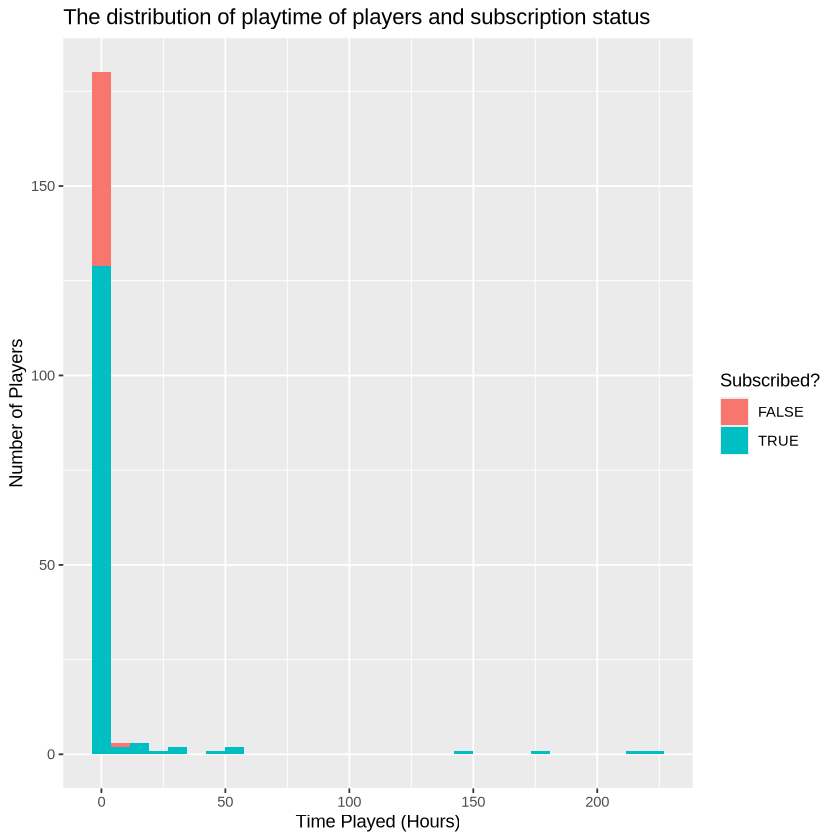

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


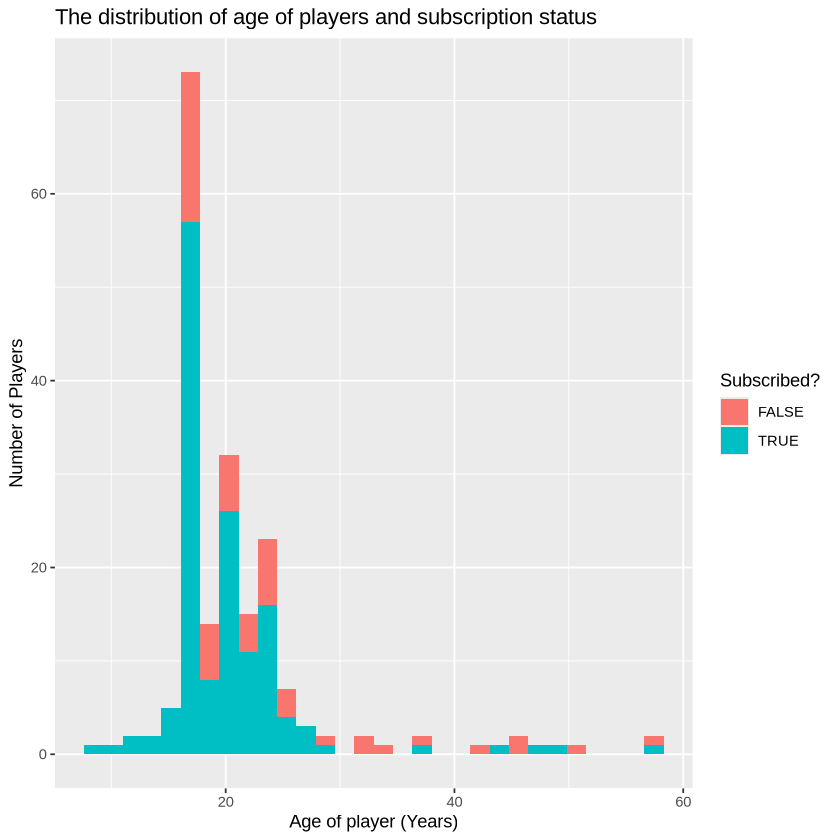

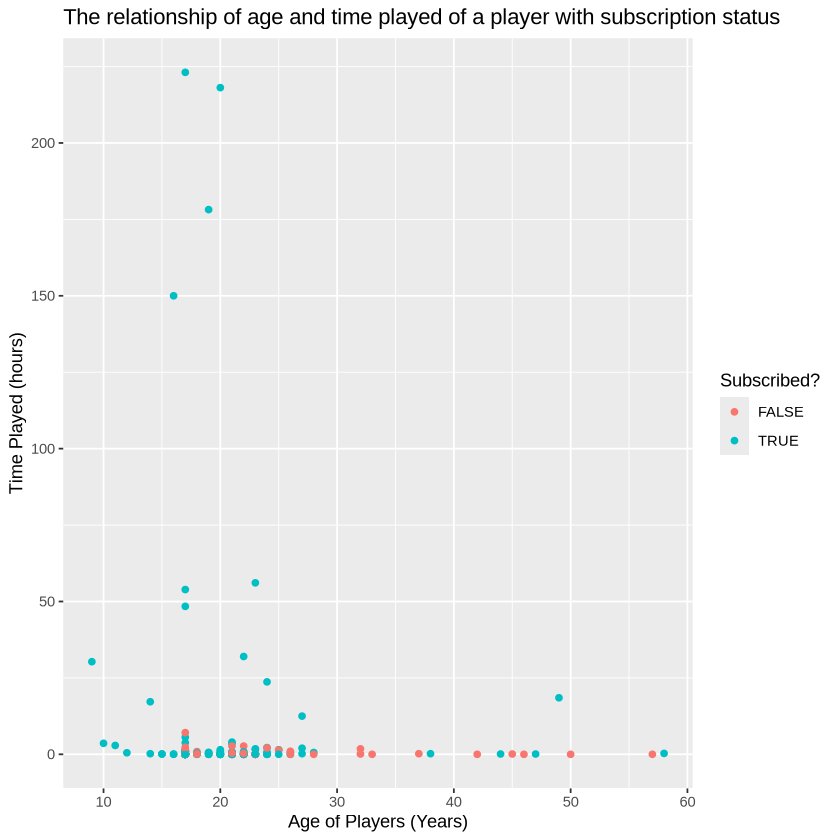

In [23]:
num_players<-nrow(players)


played_time_plot<-players|>
    ggplot(aes(x=played_hours,fill=subscribe))+
    geom_histogram()+
    labs(x="Time Played (Hours)",y="Number of Players",fill="Subscribed?")+
    ggtitle("The distribution of playtime of players and subscription status")
played_time_plot




age_plot<-players|>
    ggplot(aes(x=Age,fill=subscribe))+
    geom_histogram()+
    labs(x="Age of player (Years)",y="Number of Players",fill="Subscribed?")+
    ggtitle("The distribution of age of players and subscription status")
age_plot

age_and_time_plot<-players|>
    ggplot(aes(x=Age,y=played_hours,color=subscribe))+
    geom_point()+
    labs(x="Age of Players (Years)",y="Time Played (hours)",color="Subscribed?")+
    ggtitle("The relationship of age and time played of a player with subscription status")
age_and_time_plot


## Observations from these plots
#### Plot 1:
- players with more than 25 hours are usually all subscribed.
- helps distinguish between the different hours and subscription status
- can be used as predictor

#### Plot 2
- ages from 0 to 20 (besides 19) had higher proportion of subscribers to non subscribers compared to ages after 20, especially after 30
- can be used as predictor.

#### Plot 3
- Players in the age range of 10-20 have more hours on average compared to higher ages



# (4) Methods and Plans
Will use:
- knn classification with k nearest neighbors to predict the player's subscription status
- Age and played_hours as predictors, subscribe as response variable


#### Why this method is appropriate
- the response variable (subscribe) is a categorical variable and the two predictor variables (Age, and played_hours) are numerical variables
- knn classification can predict non linear relationships
- flexible

#### Assumptions
- data is tidy
- All data are contributing the same (data is standardized)

#### Limitations/Weaknesses

- small data set, more sensitive to outliers 

#### How I am going to compare and select the model
- Wrangle the data as stated before to make it tidy
- Standardize the training data using a recipe (step_center and step_scale)
- In the training data, tune the k (1-40)
- use 5 fold cross validation to find the most accurate amount of neighbors
- Will compare the different models via accuracy, precision, and the confusion matrix

#### How I am going to split the data

- Split the data 75/25 training:testing
- Will split before preprocessing






# Github Repository

https://github.com/RadinAlikhani/dsci100-solo-project.git